In [1]:
#Linear Regression example
import numpy as np #Linear Algebra library
import pandas as pd #Data Frames library
import matplotlib.pyplot as plt #data visualization library
import seaborn as sns #data visualizaiton library
from sklearn.linear_model import LinearRegression #importing supervised learning model
from sklearn.model_selection import train_test_split #function for splitting data randomly
from sklearn import metrics #helps test error in the end
%matplotlib inline

<h2>Input file read using pandas</h2>

In [3]:
salary_data = pd.read_csv("Salary_Data.csv")

<h1>Exploring the Data</h1>

In [70]:
#use .head() if the dataset is to large to print the entire thing.
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


<p>Seeing if we have any missing values</p>

In [71]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


<h1>Importing Dataset and Extracting Dependent and Independent Variables</h1>

<p>Setting up independent and dependent variables. Note: Our predictor values X is formatted into a 2-dimensional array containing while our target value is set up as a 1-dimensional array. To do this, we first take the salary_data and call the method iloc which is short for integer location. This helps us slice our dataset for the values we want. In our predictor variable X, we select all the rows and then we select the 0th column to the -1th column. Notice that this is done so the array is 2 dimensional, reason being if we were to have more than one predictor value, it is important we keep it as an organized array. Finally .values is called onto the sliced data to return us a numpy array that will allow us to make predictions.</p>

In [105]:
X = salary_data.iloc[:,:-1].values
X

array([[  1.1],
       [  1.3],
       [  1.5],
       [  2. ],
       [  2.2],
       [  2.9],
       [  3. ],
       [  3.2],
       [  3.2],
       [  3.7],
       [  3.9],
       [  4. ],
       [  4. ],
       [  4.1],
       [  4.5],
       [  4.9],
       [  5.1],
       [  5.3],
       [  5.9],
       [  6. ],
       [  6.8],
       [  7.1],
       [  7.9],
       [  8.2],
       [  8.7],
       [  9. ],
       [  9.5],
       [  9.6],
       [ 10.3],
       [ 10.5]])

In [95]:
y = salary_data.iloc[:,1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

<h1>Visualizing the Data</h1>

<p>this is a distribution plot of the Years of Experience of the employees in the dataset. Bins represent how many different bars the data is sorted into by rounding the values. We can see from above the numbers are not all intergers thus putting them into bins help visualize. First value passed is a one dimensional array, KDE stands for kernel density estimation. This creates a Gaussian Curve, or a normal distribution of the bar. Basically a curve that estimates the bars.</p>

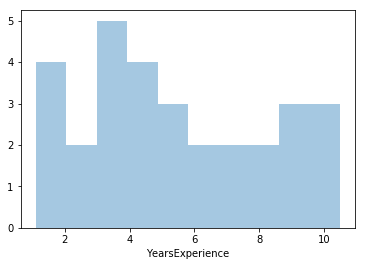

In [72]:
sns.distplot(salary_data['YearsExperience'],kde=False,bins=10)

<p>This is a countplot which is an extremely flexible function for graphing. The data that is passed to it can exist in multiple forms and countplot knows exactly how to handle it. Notice that both graphs are the exact same, but the data can be passed to the function in multiple ways. The first function passes the data straight to the parameter for the y axis and selects the "YearsExperience" series, which is a pandas class. The second implementation passes the entire dataset to the function and then tells the graph to only countplot on the y axis value of YearsExperience.</p> 

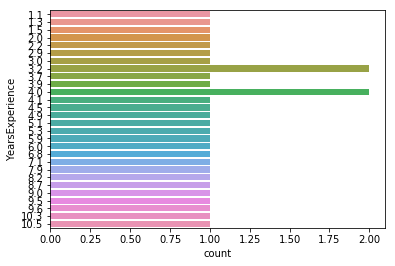

In [73]:
sns.countplot(y=salary_data["YearsExperience"])
sns.countplot(y="YearsExperience",data=salary_data)

<p>The following function .corr() performs correlation calculations. The default form of correlation calculation is the Pearson method. We can specify which method of calculation we would like so. Each have it's own benefits but one should study statistics to attempt to learn more about it.</p>

In [74]:
salary_data.corr(method='pearson')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [75]:
salary_data.corr(method='kendall')

,YearsExperience,Salary
YearsExperience,1.000000,0.841016
Salary,0.841016,1.000000


In [76]:
salary_data.corr(method='spearman')

,YearsExperience,Salary
YearsExperience,1.000000,0.956831
Salary,0.956831,1.000000


In [77]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<p>The following heatmap will allow us to visualize the correlation much better.</p>

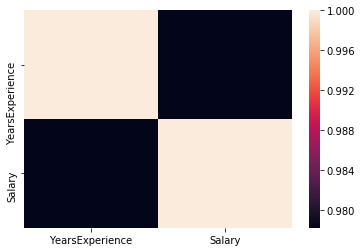

In [78]:
sns.heatmap(salary_data.corr())

<p>Visualize data to see if there is any trend between the Years of Experience people have and their salary</p>

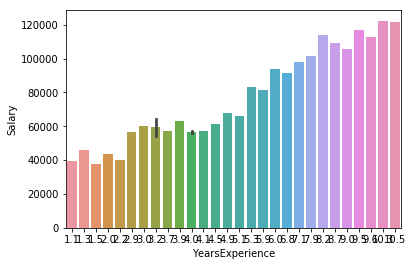

In [79]:
sns.barplot(x ='YearsExperience', y = 'Salary', data=salary_data)

<h1>Machine Learning Process</h1>

<p>Data splitting</p>

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 1/3, random_state = 0)

Fitting training data into the linear regression model

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
LoBF = lr.predict(X_train)

<p>Making predictions with our trained model onto our split test set</p>

In [83]:
y_pred = lr.predict(X_test)
y_pred

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369,  108125.8914992 ,
        116537.23969801,   64199.96201652,   76349.68719258,
        100649.1375447 ])

<p>The following code creates and scatter plot using matplotlib instead of the seaborn library. In blue we used the scatter function to display all our points of data that were randomly chosen as the training data and what the actual value of the data was. Now we take the linear regression object that we made early and fit with data to display visually the line of best fit that was created for our data. We add the appropriate titles to our plot as well.</p>

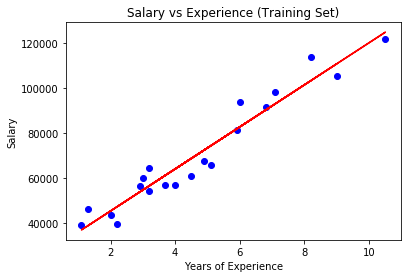

In [84]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, LoBF, color = 'red')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<p>Below is the actual predictions that we have made on the test set that we have split from our original data to evaluate how well our model would perform on data that we already have.</p>

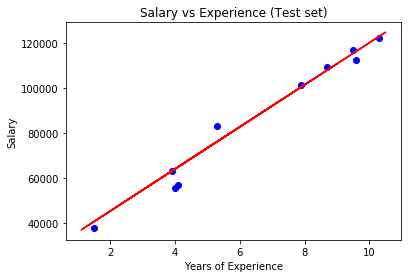

In [85]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, LoBF, color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<p>Now we check how well our model performed on the test data we split from earlier using three types of error calculations metrics from sci-kit. The three error calculations that I have used are the Mean absolute error, Mean squared error and root mean square error.</p>

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3426.42693743
MSE: 21026037.3295
RMSE: 4585.41572047
